### Student Information
Name: Yu-Han Zhao 趙宇涵

Student ID: 110033635

GitHub ID: honey0703

Kaggle name: honey0703

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

## 1. Data Preparation
### 1.1 Load data
1. Read json files
2. Split to train and test df
3. Append emotions after traon df

In [1]:
# Read json data to pd
import numpy as np 
import pandas as pd
import json

df = pd.read_json("dm2021-lab2-hw2/tweets_DM.json",lines=True, orient='columns')

In [2]:
# Show df
df.head()

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets


In [3]:
# select '_source' column as 'source'
source = df._source

# normalize 'source'
twit = pd.json_normalize(source)

# show twit
twit.head()

,tweet.hashtags,tweet.tweet_id,tweet.text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [4]:
# rename column for merge later

twit = twit.rename(columns={"tweet.hashtags": "hashtags", "tweet.tweet_id": "tweet_id", "tweet.text": "text"})
twit.head()

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [5]:
# to split train test
# read file 'data_identification.csv'

iden = pd.read_csv('dm2021-lab2-hw2/data_identification.csv')
iden.head()

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


In [6]:
# merge twit dataframe with data_identification.csv

total = pd.merge(twit, iden, on="tweet_id", how="left")
total.head()

,hashtags,tweet_id,text,identification
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test


In [7]:
# categorize the data into two set, train and test.

train = total[total["identification"] == "train"]
test = total[total["identification"] == "test"]

In [8]:
# drop hashtags column and identification column, since we will not use it

train = train.drop(columns=['hashtags', 'identification'])
test = test.drop(columns=['hashtags', 'identification'])

In [9]:
train.head()

,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
5,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...
6,0x2c91a8,Still waiting on those supplies Liscus. <LH>


In [10]:
test.head()

,tweet_id,text
2,0x28b412,"Confident of your obedience, I write to you, k..."
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
9,0x218443,When do you have enough ? When are you satisfi...
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #..."
33,0x26289a,"In these tough times, who do YOU turn to as yo..."


In [11]:
# read the labels
emo = pd.read_csv('dm2021-lab2-hw2/emotion.csv')
emo.head()

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


In [12]:
# merge train with emotions.csv

train = pd.merge(train, emo, on="tweet_id", how="left")
train.head()

,tweet_id,text,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation


In [103]:
# see the shape of the data

print("train shape :", train.shape)
print("test shape :", test.shape)

train shape : (1455563, 3)
test shape : (411972, 2)


### 1.2 Save data

In [14]:
# save to pickle file

train.to_pickle("train_df.pkl") 
test.to_pickle("test_df.pkl")

In [109]:
# load a pickle file

train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")
train_df.shape

(1455563, 3)

### 1.3 Exploratory data analysis (EDA)

In [105]:
#group to find distribution

train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

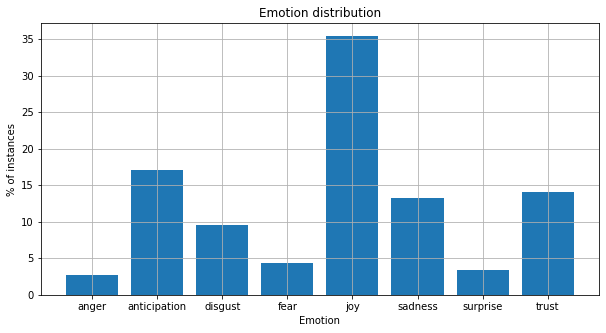

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## 2. Feature Engineering
### 2.0 Sample and train/val split 

In [112]:
train_df.shape

(1455563, 3)

In [113]:
# split data into training and testing set

from sklearn.model_selection import train_test_split

X = train_df['text']
y = train_df['emotion']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1)

In [114]:
# see the shape of the data

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_val', X_val.shape)
print('y_val', y_val.shape)

X_train (1164450,)
y_train (1164450,)
X_val (291113,)
y_val (291113,)


### 2.1 Using Bag of Words

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
def BOW():
    # build analyzers (bag-of-words)
    BOW_vectorizer = CountVectorizer() 
    
    # 1. Learn a vocabulary dictionary of all tokens in the raw documents.
    BOW_vectorizer.fit(X_train)

    # 2. Transform documents to document-term matrix.
    train_data_BOW_features = BOW_vectorizer.transform(X_train)
    val_data_BOW_features = BOW_vectorizer.transform(X_val)
    
    #  add .toarray() to show
    train_data_BOW_features.toarray()
    
    # check the dimension
    print ('shape: ', train_data_BOW_features.shape)
    
    # observe some feature names
    feature_names = BOW_vectorizer.get_feature_names()
    print (feature_names[100:110])
    print ("😂" in feature_names)
    return BOW_vectorizer

### 2.2 Use nltk tokenize

In [118]:
import nltk
def NLTK():
    # build analyzers (bag-of-words)
    BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

    # apply analyzer to training data
    BOW_500.fit(X_train)

    train_data_BOW_features_500 = BOW_500.transform(X_train)

    ## check dimension
    print ('shape:', train_data_BOW_features_500.shape)
    
    train_data_BOW_features_500.toarray()
    
    # observe some feature names
    feature_names_500 = BOW_500.get_feature_names()
    print (feature_names_500[:10])
    print ("😂" in feature_names)
    return BOW_500

### 2.3 TFIDF

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

def TFIDF():
    TFIDF_500 = TfidfVectorizer(max_features=500, tokenizer=nltk.word_tokenize, stop_words='english')
    train_data_TFIDF_features_500 = TFIDF_500.fit_transform(X_train)
    print ('shape: ', train_data_TFIDF_features_500.shape)
    train_data_TFIDF_features_500.toarray()
    feature_names_500 = TFIDF_500.get_feature_names()
    print (feature_names_500[:10])
    print ("😂" in feature_names_500)
    return TFIDF_500

In [122]:
# Choose the type of features
featureType = TFIDF()

shape:  (1164450, 500)
['!', '#', '$', '%', '&', "'", "''", "'d", "'ll", "'m"]
True


## Models

In [123]:
# Choose feature (BOW_500 / TFIDF_500)
# featureType = BOW_500 

# for a classificaiton problem, you need to provide both training & testing data
X_train = featureType.transform(X_train)
X_val = featureType.transform(X_val)

In [124]:
## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_val.shape: ', X_val.shape)
print('y_val.shape: ', y_val.shape)

X_train.shape:  (1164450, 500)
y_train.shape:  (1164450,)
X_val.shape:  (291113, 500)
y_val.shape:  (291113,)


### 3.1 Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier
def DecisionTree():
    ## build DecisionTree model
    DT_model = DecisionTreeClassifier(random_state=0)

    ## training!
    DT_model = DT_model.fit(X_train, y_train)

    ## predict!
    y_train_pred = DT_model.predict(X_train)
    y_val_pred = DT_model.predict(X_val)

    ## so we get the pred result
    print (y_val_pred[:10])
    return y_train_pred, y_val_pred

* with all training data, TFIDF features.  
training accuracy: 0.89  
testing accuracy: 0.42  

### 3.2 Naive Bayes

In [126]:
from sklearn.naive_bayes import MultinomialNB
def NaiveBayes():
    NB_model = MultinomialNB()
    
    # training!
    NB_model = NB_model.fit(X_train, y_train)
    
    ## predict!
    y_train_pred = NB_model.predict(X_train)
    y_val_pred = NB_model.predict(X_val)

    ## so we get the pred result
    print (y_val_pred[:10])
    
    return y_train_pred, y_val_pred

### 3.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def RandomForest():
    RF_model = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0, n_jobs= -1,
                                    max_depth=11, max_features='log2', verbose=1)
    
    # Training
    RF_model = clf_RF.fit(X_train, y_train)
    
    # Tesing
    y_train_pred = RF_model.predict(X_train)
    y_val_pred = RF_model.predict(X_val)
    
    # so we get the pred result
    print (y_val_pred[:10])
    
    return y_train_pred, y_val_pred

In [127]:
y_train_pred, y_val_pred = RandomForest()

['anger' 'anticipation' 'joy' 'anticipation' 'anticipation' 'fear'
 'anticipation' 'joy' 'joy' 'joy']


## Evaluation 

In [128]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_val = accuracy_score(y_true=y_val, y_pred=y_val_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_val, 2)))

training accuracy: 0.89
testing accuracy: 0.42


In [129]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_val, y_pred=y_val_pred))

              precision    recall  f1-score   support

       anger       0.18      0.14      0.16      8021
anticipation       0.44      0.42      0.43     50164
     disgust       0.26      0.24      0.25     27672
        fear       0.29      0.21      0.24     13007
         joy       0.50      0.62      0.56    102799
     sadness       0.35      0.33      0.34     38812
    surprise       0.26      0.17      0.20      9695
       trust       0.33      0.27      0.30     40943

    accuracy                           0.42    291113
   macro avg       0.33      0.30      0.31    291113
weighted avg       0.40      0.42      0.40    291113



In [130]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_val, y_pred=y_val_pred) 
print(cm)

[[ 1119   942  1046   286  2588  1229   162   649]
 [  727 20956  2729  1089 15937  3693   639  4394]
 [  766  2787  6590   817  8609  5348   693  2062]
 [  342  1439  1075  2693  4717  1484   265   992]
 [ 1378 11162  5130  2119 64241  7127  1318 10324]
 [  904  3705  4879  1098 11681 12768   922  2855]
 [  226  1035  1053   303  3287  1390  1605   796]
 [  601  5190  2514   958 16934  3199   641 10906]]


In [131]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

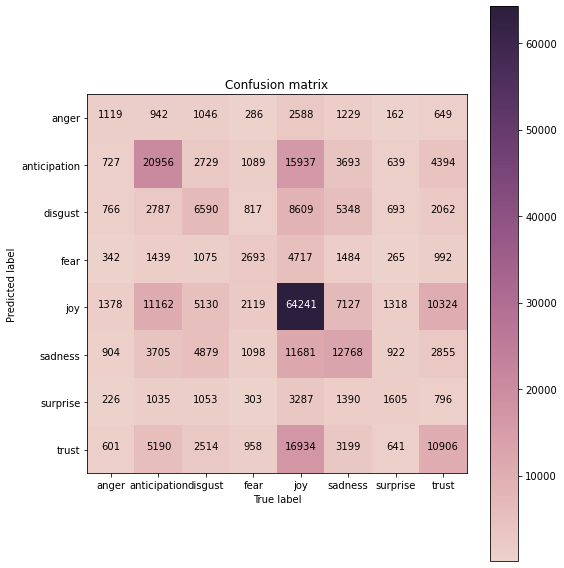

In [132]:
# plot your confusion matrix
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

## Output Result

In [62]:
# Load data
X_test = test['text']

# Transform X
X_test = TFIDF_500.transform(X_test)
print('X_test.shape: ', X_test.shape)

# Predict
y_test_pred = DT_model.predict(X_test)
print (y_test_pred[:10])

X_test.shape:  (411972, 500)
['fear' 'anticipation' 'joy' 'anticipation' 'anger' 'joy' 'sadness'
 'anticipation' 'disgust' 'anticipation']


In [63]:
# Submission
submission = pd.DataFrame({'id':test['tweet_id'],'emotion':y_test_pred})
submission.head()

,id,emotion
2,0x28b412,fear
4,0x2de201,anticipation
9,0x218443,joy
30,0x2939d5,anticipation
33,0x26289a,anger


In [64]:
# Check the shape
submission.shape

(411972, 2)

In [66]:
# path = 'Result/'
# filename = 'NB_TFIDF500.csv'
# submission.to_csv(path+filename, index=False)
# print('Saved file: ' + filename)

Saved file: NB_TFIDF500.csv
